<font color = purple>
    
# Coleta de Dados

In [221]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pio.renderers.default = 'iframe'
sns.set_theme(context = 'notebook', palette = 'flare_r')
warnings.filterwarnings('ignore')

In [222]:
dados = pd.read_csv('../Projetos/exoplanets.csv', low_memory = False)
print(f'Este data frame contêm {dados.shape[0]} linhas e {dados.shape[1]} colunas. \n')
dados.head(3)

Este data frame contêm 5747 linhas e 314 colunas. 



,A,AUPPER,ALOWER,UA,AREF,AURL,AR,ARUPPER,ARLOWER,UAR,...,VREF,VURL,VSINI,VSINIUPPER,VSINILOWER,UVSINI,VSINIREF,VSINIURL,KEPID,KDE
0,0.078010,0.001300,0.001300,0.001300,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,11.9153,0.443805,0.443805,0.443805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.034472,0.000676,0.000676,0.000676,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,15.1619,0.974724,0.974724,0.974724,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
2,0.137610,0.002897,0.002897,0.002897,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,31.8896,3.494090,3.494090,3.494090,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1


<font color = purple size = 4>

# Amostra Geral

Selecionando quais colunas serão utilizadas

In [223]:
df_g = dados[['NAME', 'ECC', 'ECCUPPER', 'ECCLOWER', 'MSTAR', 'MSTARUPPER', 'MSTARLOWER', 'PER', 'PERUPPER', 'PERLOWER', 'PLANETDISCMETH']]

In [224]:
df_g['PER'] = df_g['PER']/365
df_g['PERUPPER'] = df_g['PERUPPER']/365
df_g['PERLOWER'] = df_g['PERLOWER']/365

df_g['A'] = df_g['PER']**(2/3) 
df_g['AUPPER'] = (2/3)*df_g['A']*df_g['PERUPPER']/df_g['PER']
df_g['ALOWER'] = (2/3)*df_g['A']*df_g['PERLOWER']/df_g['PER']

In [225]:
df_g.describe().round(3)

,ECC,ECCUPPER,ECCLOWER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER,A,AUPPER,ALOWER
count,4784.000,821.000,821.000,4929.000,4839.000,4839.000,5733.000,5531.000,5531.000,5733.000,5531.000,5531.000
mean,0.031,0.081,0.043,1.003,0.095,0.098,0.698,0.009,0.010,0.373,0.003,0.003
std,0.104,0.096,0.045,0.308,0.089,0.132,14.231,0.158,0.241,1.782,0.045,0.068
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.006,0.000,-0.000
25%,0.000,0.020,0.008,0.850,0.043,0.044,0.014,0.000,0.000,0.058,0.000,0.000
50%,0.000,0.050,0.030,0.980,0.070,0.065,0.038,0.000,0.000,0.113,0.000,0.000
75%,0.000,0.100,0.065,1.110,0.120,0.110,0.157,0.000,0.000,0.291,0.000,0.000
max,0.970,0.900,0.290,3.601,2.450,2.090,872.597,9.353,14.600,91.315,2.599,4.088


In [226]:
df_g.notna().sum()

NAME              5747
ECC               4784
ECCUPPER           821
ECCLOWER           821
MSTAR             4929
MSTARUPPER        4839
MSTARLOWER        4839
PER               5733
PERUPPER          5531
PERLOWER          5531
PLANETDISCMETH    3262
A                 5733
AUPPER            5531
ALOWER            5531
dtype: int64

<font color = purple size =4>
<p>

## KOI (Kepler Objects of Interest):

Os dados do tipo [KOI](https://exoplanetarchive.ipac.caltech.edu/docs/Kepler_KOI_docs.html) são eventos periódicos, que parecem planetas transitando a estrela, mas ainda não foi confirmado. Por isso, vou retirá-los da amostra.

In [227]:
df_g = df_g.query("not NAME.str.contains('KOI')")
df_g.describe().round(3)

,ECC,ECCUPPER,ECCLOWER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER,A,AUPPER,ALOWER
count,2404.000,820.000,820.000,2549.000,2465.000,2465.000,3247.000,3166.000,3166.000,3247.000,3166.000,3166.000
mean,0.062,0.081,0.043,1.000,0.071,0.068,0.937,0.015,0.018,0.414,0.005,0.006
std,0.140,0.096,0.045,0.304,0.092,0.095,17.841,0.208,0.319,2.175,0.059,0.090
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000
25%,0.000,0.020,0.008,0.850,0.036,0.040,0.013,0.000,0.000,0.054,0.000,0.000
50%,0.000,0.050,0.030,0.990,0.050,0.050,0.033,0.000,0.000,0.104,0.000,0.000
75%,0.042,0.100,0.065,1.130,0.080,0.070,0.114,0.000,0.000,0.236,0.000,0.000
max,0.970,0.900,0.290,3.090,2.450,2.090,872.597,9.353,14.600,91.315,2.599,4.088


In [228]:
df_g.head()  # Amostra final

,NAME,ECC,ECCUPPER,ECCLOWER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER,PLANETDISCMETH,A,AUPPER,ALOWER
0,Kepler-107 d,NaN,NaN,NaN,NaN,NaN,NaN,0.021803,2.849315e-07,2.849315e-07,Transit,0.078046,6.799472e-07,6.799472e-07
1,Kepler-1049 b,0.0,NaN,NaN,0.51,0.03,0.03,0.008968,1.454795e-08,1.454795e-08,Transit,0.043166,4.668087e-08,4.668087e-08
2,Kepler-813 b,0.0,NaN,NaN,0.95,0.05,0.07,0.052410,2.042466e-07,2.042466e-07,Transit,0.140047,3.638537e-07,3.638537e-07
3,Kepler-427 b,0.0,0.57,0.0,0.96,0.06,0.06,0.028195,3.013699e-09,3.013699e-09,Transit,0.092635,6.601162e-09,6.601162e-09
4,Kepler-1056 b,0.0,NaN,NaN,1.12,0.20,0.12,0.075330,3.991781e-07,3.991781e-07,Transit,0.178367,6.301133e-07,6.301133e-07


<font color = purple size =4>
<p>

## Sistema Solar

Para comparar nosso Sistema Solar com outros sistemas planetários, estou utilizando dados disponibilizados pela NASA, no [Planetary Fact Sheet](Disponível em:<https://nssdc.gsfc.nasa.gov/planetary/factsheet/>)

In [229]:
df_planetas = {
    "NAME": ["M", "V", "T", "M", "J", "S", "U", "N"],
    "PER": [88.0/365.25, 224.7/365.25, 365.2/365.25, 687.0/365.25, 4331/365.25, 10747/365.25,
                               30589/365.25, 59800/365.25],
    "A": [57.9/149.6, 108.2/149.6, 149.6/149.6, 228.0/149.6, 778.5/149.6, 1432.0/149.6,
                                   2867.0/149.6, 4515.0/149.6],
    "ECC": [0.206, 0.007, 0.017, 0.094, 0.049, 0.052, 0.047, 0.010]
}

# Criando o DataFrame
planetas = pd.DataFrame(df_planetas)

planetas['PER^2'] = planetas['PER']**2
planetas['A^3'] = planetas['A']**3
planetas

,NAME,PER,A,ECC,PER^2,A^3
0,M,0.240931,0.387032,0.206,0.058048,0.057975
1,V,0.615195,0.723262,0.007,0.378465,0.378344
2,T,0.999863,1.000000,0.017,0.999726,1.000000
3,M,1.880903,1.524064,0.094,3.537798,3.540053
4,J,11.857632,5.203877,0.049,140.603431,140.922737
5,S,29.423682,9.572193,0.052,865.753087,877.070034
6,U,83.748118,19.164439,0.047,7013.747223,7038.632626
7,N,163.723477,30.180481,0.010,26805.376944,27490.236959


In [230]:
planetas['MSUN'] = 1
planetas['VELO'] = np.sqrt(planetas['MSUN']/planetas['A'])*29.88
planetas

,NAME,PER,A,ECC,PER^2,A^3,MSUN,VELO
0,M,0.240931,0.387032,0.206,0.058048,0.057975,1,48.029394
1,V,0.615195,0.723262,0.007,0.378465,0.378344,1,35.134418
2,T,0.999863,1.000000,0.017,0.999726,1.000000,1,29.880000
3,M,1.880903,1.524064,0.094,3.537798,3.540053,1,24.203544
4,J,11.857632,5.203877,0.049,140.603431,140.922737,1,13.098365
5,S,29.423682,9.572193,0.052,865.753087,877.070034,1,9.657726
6,U,83.748118,19.164439,0.047,7013.747223,7038.632626,1,6.825470
7,N,163.723477,30.180481,0.010,26805.376944,27490.236959,1,5.438981


<font color = purple size = 4>

# Projeto 1ª Lei de Kepler (Excentricidades)

In [231]:
df_ecc = df_g[['NAME', 'ECC', 'ECCUPPER', 'ECCLOWER', 'PER', 'PERLOWER', 'PERUPPER']]

In [232]:
df_ecc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3261 entries, 0 to 3262
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      3261 non-null   object 
 1   ECC       2404 non-null   float64
 2   ECCUPPER  820 non-null    float64
 3   ECCLOWER  820 non-null    float64
 4   PER       3247 non-null   float64
 5   PERLOWER  3166 non-null   float64
 6   PERUPPER  3166 non-null   float64
dtypes: float64(6), object(1)
memory usage: 203.8+ KB


In [233]:
df_ecc.isna().sum()

NAME           0
ECC          857
ECCUPPER    2441
ECCLOWER    2441
PER           14
PERLOWER      95
PERUPPER      95
dtype: int64

In [234]:
df_ecc = df_ecc.dropna().reset_index(drop = True)
df_ecc.isna().sum()

NAME        0
ECC         0
ECCUPPER    0
ECCLOWER    0
PER         0
PERLOWER    0
PERUPPER    0
dtype: int64

In [235]:
df_ecc_0 = df_ecc[df_ecc['ECC'] == 0]
df_ecc.shape

(811, 7)

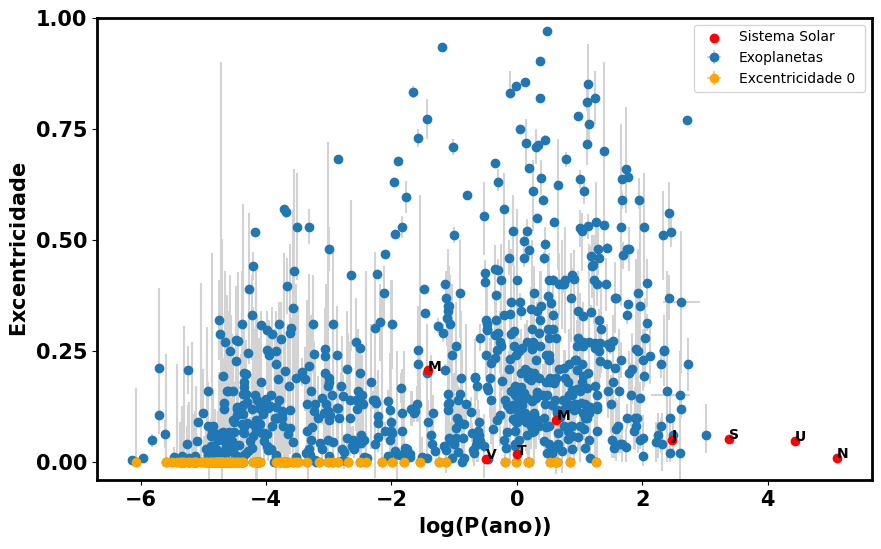

In [236]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = (10, 6))

'''Plotando os dados com margem de erro'''
ax.errorbar(x = np.log(df_ecc['PER']), y = df_ecc['ECC'], 
            xerr = [df_ecc['PERLOWER']/(df_ecc['PER']*np.log(10)), df_ecc['PERUPPER']/(df_ecc['PER']*np.log(10))],
            yerr = [df_ecc['ECCLOWER'], df_ecc['ECCUPPER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            alpha = 1, label = 'Exoplanetas')

ax.errorbar(x = np.log(df_ecc_0['PER']), y = df_ecc_0['ECC'], 
            xerr = [df_ecc_0['PERLOWER']/(np.log(10)*df_ecc_0['PER']), df_ecc_0['PERUPPER']/(np.log(10)*df_ecc_0['PER'])],
            yerr = [df_ecc_0['ECCLOWER'], df_ecc_0['ECCUPPER']], fmt = 'o', color='orange', ecolor='#d3d3d3',
            alpha = 1, label = 'Excentricidade 0 ')

'''Editando o gráfico'''
ax.set_xlabel(r'$\mathbf{log(P(ano))}$', fontsize = 15)
ax.set_ylabel(r'$\mathbf{Excentricidade}$', fontsize = 15)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_xlim(-4.5, 4)
ax.set_ylim(-0.04, 1)

def bordas(ax):
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

bordas(ax)

plt.scatter(x = np.log(planetas['PER']), y = planetas['ECC'], c = 'red', zorder = 10, label = 'Sistema Solar')

for i, j, k in zip(planetas['PER'], planetas['ECC'], planetas['NAME']):
    ax.annotate(xy = (np.log(i), j), text = f'{k}', zorder = 10, fontweight='bold')

ax.legend()
fig.show()

In [237]:
sum(df_ecc.ECC == 0)/df_ecc['ECC'].shape[0]

0.13316892725030827

<font color = purple size = 4>

# Projeto 3ª Lei de Kepler - Velocidades

In [238]:
df = df_g[['NAME', 'A', 'AUPPER', 'ALOWER', 'MSTAR', 'MSTARLOWER', 'MSTARUPPER']]
df_velo_limpo = df.replace(0, np.nan).dropna().reset_index(drop = True)
df_velo_limpo.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER
0,Kepler-1049 b,0.043166,4.668087e-08,4.668087e-08,0.51,0.03,0.03
1,Kepler-813 b,0.140047,3.638537e-07,3.638537e-07,0.95,0.07,0.05
2,Kepler-427 b,0.092635,6.601162e-09,6.601162e-09,0.96,0.06,0.06
3,Kepler-1056 b,0.178367,6.301133e-07,6.301133e-07,1.12,0.12,0.20
4,Kepler-1165 b,0.087693,3.644578e-07,3.644578e-07,1.13,0.08,0.12


In [239]:
df_velo_limpo.shape

(2329, 7)

In [269]:
df_velo_limpo['VELO'] = df_velo_limpo['MSTAR']/df_velo_limpo['A']
df_velo_limpo['VELO'] = df_velo_limpo['VELO']**(.5)
df_velo_limpo.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO,VELOUPPER,VELOLOWER
0,Kepler-1049 b,0.043166,4.668087e-08,4.668087e-08,0.51,0.03,0.03,3.437270,12.009604,12.009604
1,Kepler-813 b,0.140047,3.638537e-07,3.638537e-07,0.95,0.07,0.05,2.604504,8.930963,12.503349
2,Kepler-427 b,0.092635,6.601162e-09,6.601162e-09,0.96,0.06,0.06,3.219196,12.214626,12.214626
3,Kepler-1056 b,0.178367,6.301133e-07,6.301133e-07,1.12,0.12,0.20,2.505833,29.531258,17.718755
4,Kepler-1165 b,0.087693,3.644578e-07,3.644578e-07,1.13,0.08,0.12,3.589687,22.317339,14.878226


In [270]:
df_velo_limpo['Q'] = df_velo_limpo['MSTAR']/df_velo_limpo['A']
df_velo_limpo['QUPPER'] = df_velo_limpo['Q']*np.sqrt((df_velo_limpo['MSTARUPPER']/df_velo_limpo['MSTAR'])**2 +\
                                               (df_velo_limpo['AUPPER']/df_velo_limpo['A'])**2)
df_velo_limpo['QLOWER'] = df_velo_limpo['Q']*np.sqrt((df_velo_limpo['MSTARLOWER']/df_velo_limpo['MSTAR'])**2 +\
                                               (df_velo_limpo['ALOWER']/df_velo_limpo['A'])**2)
df_velo_limpo['VELO'] = np.sqrt(df_velo_limpo['Q'])
df_velo_limpo['VELOUPPER'] = np.sqrt(df_velo_limpo['QUPPER'])/2*np.sqrt(df_velo_limpo['Q'])
df_velo_limpo['VELOLOWER'] = np.sqrt(df_velo_limpo['QLOWER'])/2*np.sqrt(df_velo_limpo['Q'])
df_velo_limpo.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO,VELOUPPER,VELOLOWER,Q,QUPPER,QLOWER
0,Kepler-1049 b,0.043166,4.668087e-08,4.668087e-08,0.51,0.03,0.03,3.437270,1.432758,1.432758,11.814826,0.694990,0.694990
1,Kepler-813 b,0.140047,3.638537e-07,3.638537e-07,0.95,0.07,0.05,2.604504,0.778114,0.920677,6.783443,0.357023,0.499833
2,Kepler-427 b,0.092635,6.601162e-09,6.601162e-09,0.96,0.06,0.06,3.219196,1.295403,1.295403,10.363225,0.647702,0.647702
3,Kepler-1056 b,0.178367,6.301133e-07,6.301133e-07,1.12,0.12,0.20,2.505833,1.326723,1.027676,6.279201,1.121286,0.672772
4,Kepler-1165 b,0.087693,3.644578e-07,3.644578e-07,1.13,0.08,0.12,3.589687,2.099591,1.714309,12.885856,1.368409,0.912273


In [271]:
df_velo_limpo['VELO'] = df_velo_limpo['VELO']*29.88
df_velo_limpo['VELOUPPER'] = df_velo_limpo['VELOUPPER']*29.88
df_velo_limpo['VELOLOWER'] = df_velo_limpo['VELOLOWER']*29.88
df_velo_limpo.drop(columns = ['QUPPER', 'QLOWER'], inplace = True)

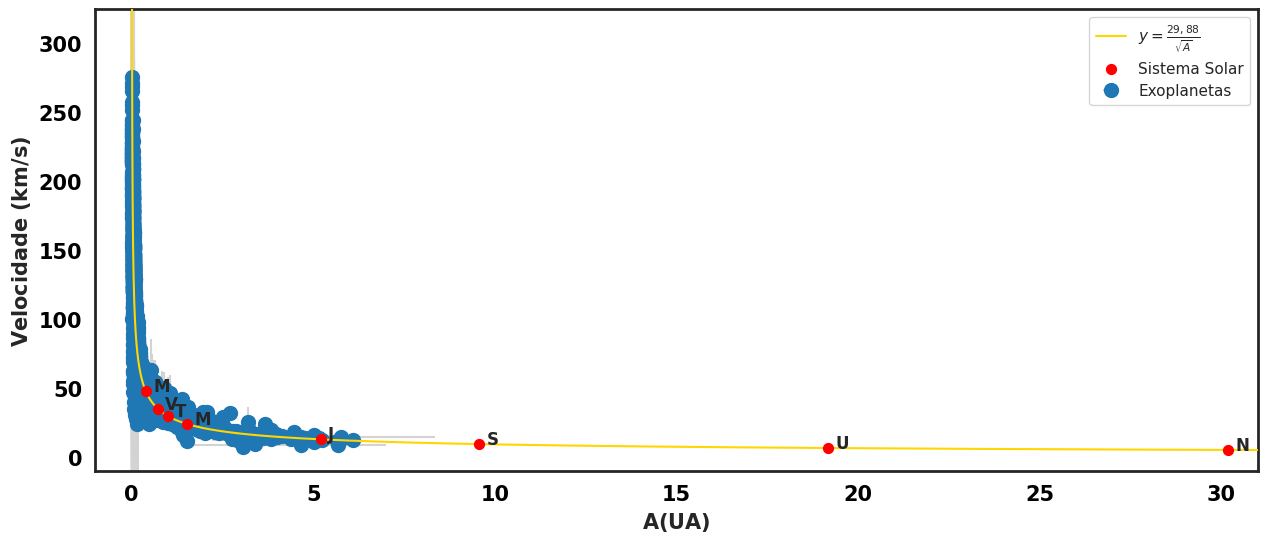

In [272]:
sns.set_theme(style = 'white')
fig, ax = plt.subplots(figsize = (15, 6))

ax.errorbar(x = df_velo_limpo['A'], y = df_velo_limpo['VELO'], 
            xerr = [df_velo_limpo['ALOWER'], df_velo_limpo['AUPPER']],
            yerr = [df_velo_limpo['VELOUPPER'], df_velo_limpo['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
            alpha = 1, label = 'Exoplanetas', markersize = 10)

ax.set_xlabel(r'$\mathbf{A (UA)}$', fontsize = 15)
ax.set_ylabel(r'$\mathbf{Velocidade\ (km/s)}$', fontsize = 15)
ax.set_ylim(-10, 324.5)
ax.set_xlim(-1, 31)

ax.tick_params(axis='both', colors='black', width= 1)

bordas(ax)

x = []
z = []
for i in np.arange(0.001, 100, 0.0001):
    x.append(i)
    z.append((1/i**.5)*29.88)
ax.plot(x, z, alpha = 1, label = r'$y = \frac{29,88}{\sqrt{A}}$', c = 'gold', zorder = 10)      # gera o plot

for i, j, k in zip(planetas['A'], planetas['VELO'], planetas['NAME']):
    ih = i + .2
    jh = j + 5
    ax.annotate(xy = (ih, j), text = f'{k}', zorder = 10, fontweight='bold')

ax.scatter(x = planetas['A'], y = planetas['VELO'], color = 'red', zorder = 10, label = 'Sistema Solar', s = 50)

plt.legend()
plt.show()

<font color = purple size = 4>

## Separação por massas

In [273]:
df_massas = df_velo_limpo.sort_values(by = 'MSTAR').reset_index(drop = True)
df_massas.head()

,NAME,A,AUPPER,ALOWER,MSTAR,MSTARLOWER,MSTARUPPER,VELO,VELOUPPER,VELOLOWER,Q
0,TRAPPIST-1 h,0.138277,3.929445e-07,3.929445e-07,0.089,0.006,0.006,23.971815,2.496732,2.496732,0.643636
1,TRAPPIST-1 b,0.025780,4.436445e-09,4.436445e-09,0.089,0.006,0.006,55.517544,13.391540,13.391540,3.452227
2,TRAPPIST-1 d,0.049748,6.387407e-07,6.387407e-07,0.089,0.006,0.006,39.965907,6.939839,6.939839,1.789032
3,TRAPPIST-1 g,0.104638,1.016353e-07,1.016353e-07,0.089,0.006,0.006,27.556992,3.299390,3.299390,0.850555
4,TRAPPIST-1 f,0.086001,9.965131e-08,9.965131e-08,0.089,0.006,0.006,30.396442,4.014353,4.014353,1.034866


In [274]:
df_massas.shape

(2329, 11)

<Axes: xlabel='MSTAR', ylabel='Count'>

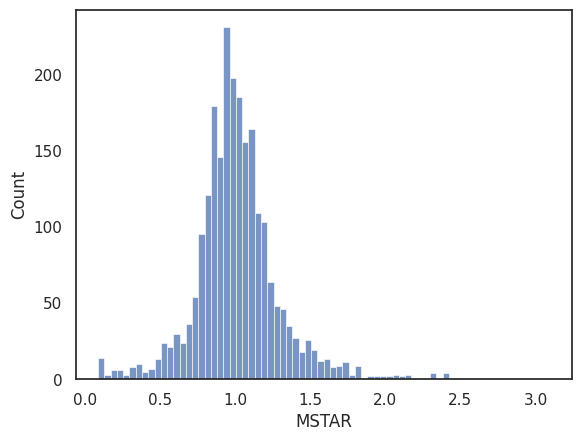

In [275]:
sns.set_theme(style = 'white')
sns.histplot(df_massas['MSTAR'])

In [314]:
classe_a = df_massas.iloc[:391]
classe_b = df_massas.iloc[391:805]
classe_c = df_massas.iloc[805:1170]
classe_d = df_massas.iloc[1170:1572]    #definições de acordo com as massas da estrelas, ver próximos gráficos
classe_e = df_massas.iloc[1572:1927]
classe_f = df_massas.iloc[1927:]

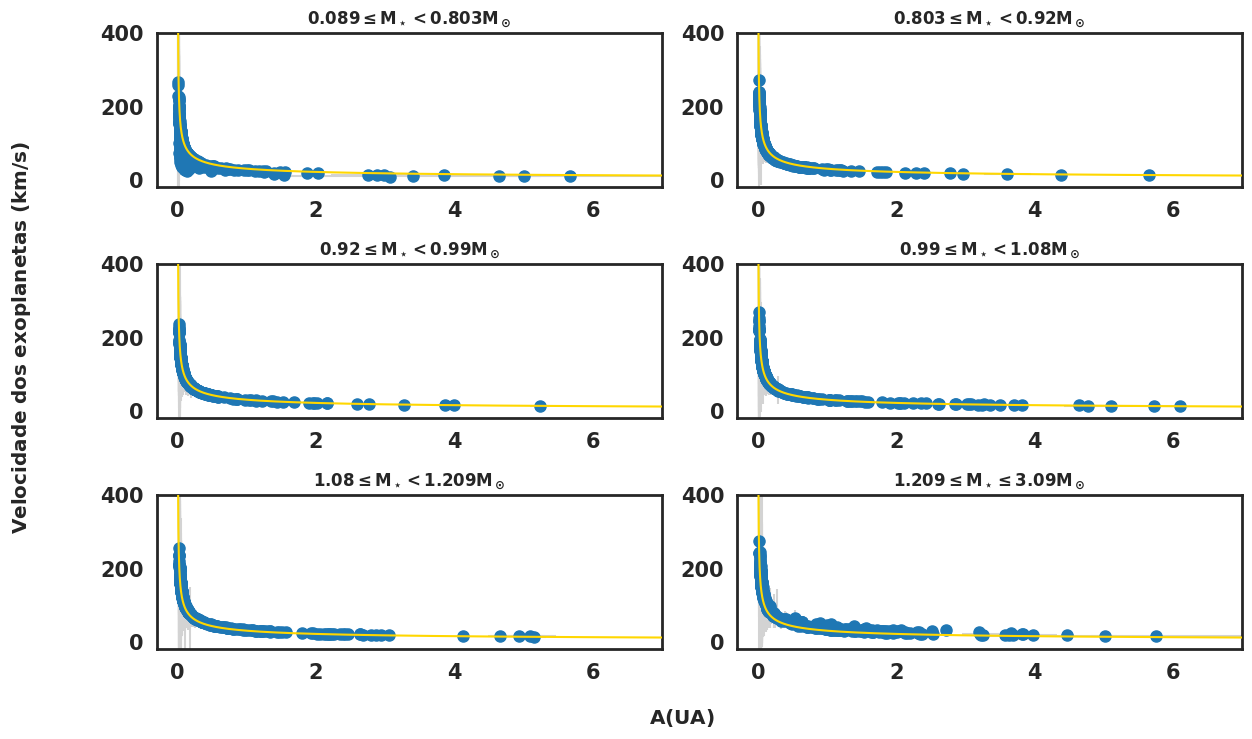

In [321]:
sns.set_theme(style = 'white')
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 8))
fig.subplots_adjust(hspace = 0.5, wspace = 0.15)

def grafico(axx, axy, classe):
    x = []
    y = []
    for i in np.arange(0.002, 7, 0.0001):
        x.append(i)
        y.append((1/i**.5)*29.88)
    ax[axx, axy].plot(x, y, c = 'gold', zorder = 10)      # gera o plot
    ax[axx, axy].set_ylim(-20, 400)
    ax[axx, axy].set_xlim(-.3, 7)
    ax[axx, axy].set_xticks([0, 2, 4, 6])
    bordas(ax[axx, axy])
    
    ax[axx, axy].errorbar(x = classe['A'], y = classe['VELO'], 
                xerr = [classe['ALOWER'], classe['AUPPER']],
                yerr = [classe['VELOUPPER'], classe['VELOLOWER']], fmt = 'o', color='#1f77b4', ecolor='#d3d3d3',
                markersize = 8)

grafico(0, 0, classe_a)
ax[0, 0].set_title(r'$\bf{0.089 \leq M_\star < 0.803 M_\odot}$')

grafico(0, 1, classe_b)
ax[0, 1].set_title(r'$\bf{0.803 \leq M_\star < 0.92 M_\odot}$')

grafico(1, 0, classe_c)
ax[1, 0].set_title(r'$\bf{0.92 \leq M_\star < 0.99 M_\odot}$')

grafico(1, 1, classe_d)
ax[1, 1].set_title(r'$\bf{0.99 \leq M_\star < 1.08 M_\odot}$')

grafico(2, 0, classe_e)
ax[2, 0].set_title(r'$\bf{1.08 \leq M_\star < 1.209 M_\odot}$')

grafico(2, 1, classe_f)
ax[2, 1].set_title(r'$\bf{1.209 \leq M_\star \leq 3.09 M_\odot}$')

fig.supylabel(r'$\mathbf{Velocidade\ dos\ exoplanetas\ (km/s)}$')
fig.supxlabel(r'$\mathbf{A (UA)}$')
plt.show()

In [278]:
df_m_solar = df_massas[(df_massas['MSTAR']<=1.1) & (df_massas['MSTAR']>=0.9)]

<font color = purple size = 4>

## Número de exoplanetas descobertos

In [279]:
df_descobertas = dados[['NAME', 'DATE']]
df_desc_sem_koi = df_descobertas.query('not NAME.str.contains("KOI")')
df_desc_limpo = df_desc_sem_koi.replace(0, np.nan).dropna().reset_index(drop = True)
df_desc_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    3261 non-null   object 
 1   DATE    3261 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


In [280]:
frequencia = df_desc_limpo.groupby('DATE').count()

In [281]:
frequencia_acumulada = frequencia.cumsum()
frequencia_acumulada.head()

,NAME
DATE,
1988.0,1
1989.0,2
1992.0,4
1993.0,5
1994.0,6


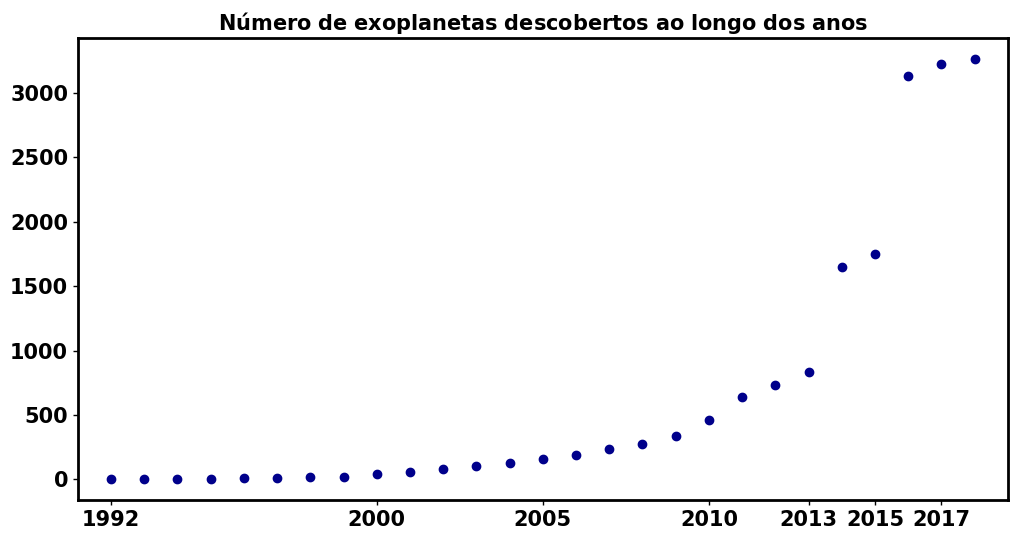

In [282]:
'''Definindo a figura'''

plt.style.use('default')

fig, ax = plt.subplots(figsize = (12, 6))


'''Plotando o gráfico'''

ax.scatter(x = frequencia_acumulada.index, y = frequencia_acumulada.values, color='darkblue')

ax.set_title(r'$\mathbf{Número\ de\ exoplanetas\ descobertos\ ao\ longo\ dos\ anos}$', fontsize= 15)
ax.set_xlabel('', fontsize = 15)
# ax.set_ylabel(r'\mathbf{Número de exoplanetas}$', fontsize = 15)

ax.set_xticks([1992, 2000, 2005, 2010, 2013, 2015, 2017 ])
ax.set_xlim(1991, 2019)
ax.tick_params(axis='both', colors='black', width= 1)

bordas(ax)

fig.show()

<font color = purple size = 4>

# Projeto 3ª Lei de Kepler - Exoplanetas

In [326]:
df_ter = df_g[['NAME', 'A', 'AUPPER', 'ALOWER', 'PER', 'PERUPPER', 'PERLOWER']]
df_ter.isna().sum()

NAME         0
A           14
AUPPER      95
ALOWER      95
PER         14
PERUPPER    95
PERLOWER    95
dtype: int64

In [327]:
df_ter.describe().round(3)

,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER
count,3247.000,3166.000,3166.000,3247.000,3166.000,3166.000
mean,0.414,0.005,0.006,0.937,0.015,0.018
std,2.175,0.059,0.090,17.841,0.208,0.319
min,0.006,0.000,0.000,0.000,0.000,0.000
25%,0.054,0.000,0.000,0.013,0.000,0.000
50%,0.104,0.000,0.000,0.033,0.000,0.000
75%,0.236,0.000,0.000,0.114,0.000,0.000
max,91.315,2.599,4.088,872.597,9.353,14.600


In [328]:
df_limpo = df_ter.replace(0, np.nan).dropna().reset_index(drop = True)
df_limpo.head()

,NAME,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER
0,Kepler-107 d,0.078046,6.799472e-07,6.799472e-07,0.021803,2.849315e-07,2.849315e-07
1,Kepler-1049 b,0.043166,4.668087e-08,4.668087e-08,0.008968,1.454795e-08,1.454795e-08
2,Kepler-813 b,0.140047,3.638537e-07,3.638537e-07,0.052410,2.042466e-07,2.042466e-07
3,Kepler-427 b,0.092635,6.601162e-09,6.601162e-09,0.028195,3.013699e-09,3.013699e-09
4,Kepler-1056 b,0.178367,6.301133e-07,6.301133e-07,0.075330,3.991781e-07,3.991781e-07


In [329]:
df_limpo.describe().round(4)

,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER
count,3166.0000,3166.0000,3166.0000,3166.0000,3166.0000,3166.0000
mean,0.3460,0.0052,0.0059,0.4106,0.0155,0.0181
std,0.7122,0.0592,0.0901,1.3812,0.2084,0.3188
min,0.0062,0.0000,0.0000,0.0005,0.0000,0.0000
25%,0.0532,0.0000,0.0000,0.0123,0.0000,0.0000
50%,0.1028,0.0000,0.0000,0.0330,0.0000,0.0000
75%,0.2356,0.0000,0.0000,0.1144,0.0000,0.0000
max,7.4900,2.5992,4.0877,20.4986,9.3534,14.6000


In [330]:
df_limpo['A^3'] = df_limpo['A']**3
df_limpo['deltaAUPPER^3'] = 3*df_limpo['A']**2*df_limpo['AUPPER']
df_limpo['deltaALOWER^3'] = 3*df_limpo['A']**2*df_limpo['ALOWER']

df_limpo['PER^2'] = df_limpo['PER']**2
df_limpo['deltaPERUPPER^2'] = 2*df_limpo['PER']*df_limpo['PERUPPER']
df_limpo['deltaPERLOWER^2'] = 2*df_limpo['PER']*df_limpo['PERLOWER']
df_limpo.head()

,NAME,A,AUPPER,ALOWER,PER,PERUPPER,PERLOWER,A^3,deltaAUPPER^3,deltaALOWER^3,PER^2,deltaPERUPPER^2,deltaPERLOWER^2
0,Kepler-107 d,0.078046,6.799472e-07,6.799472e-07,0.021803,2.849315e-07,2.849315e-07,0.000475,1.242489e-08,1.242489e-08,0.000475,1.242489e-08,1.242489e-08
1,Kepler-1049 b,0.043166,4.668087e-08,4.668087e-08,0.008968,1.454795e-08,1.454795e-08,0.000080,2.609432e-10,2.609432e-10,0.000080,2.609432e-10,2.609432e-10
2,Kepler-813 b,0.140047,3.638537e-07,3.638537e-07,0.052410,2.042466e-07,2.042466e-07,0.002747,2.140893e-08,2.140893e-08,0.002747,2.140893e-08,2.140893e-08
3,Kepler-427 b,0.092635,6.601162e-09,6.601162e-09,0.028195,3.013699e-09,3.013699e-09,0.000795,1.699395e-10,1.699395e-10,0.000795,1.699395e-10,1.699395e-10
4,Kepler-1056 b,0.178367,6.301133e-07,6.301133e-07,0.075330,3.991781e-07,3.991781e-07,0.005675,6.014051e-08,6.014051e-08,0.005675,6.014051e-08,6.014051e-08


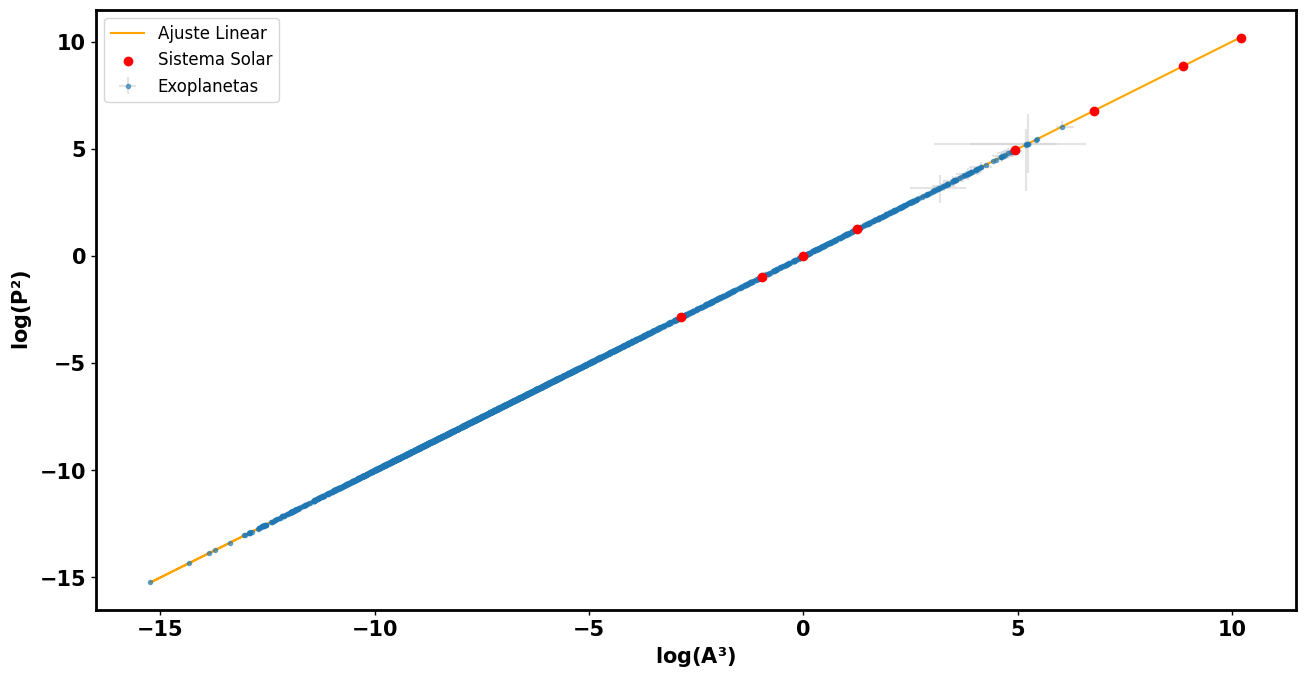

In [331]:
'''definindo o estilo da imagem e criando a figura'''
plt.style.use('default')  
fig = plt.figure(figsize = (12, 6))
ax = fig.add_axes([0, 0, 1, 1])   # Adicionando os eixoss

'''Realizando o ajusto dos pontos'''
inclinacao, intercept = np.polyfit(np.log(pd.concat([df_limpo['A^3'],planetas['A^3']])), 
                                   np.log(pd.concat([df_limpo['PER^2'], planetas['PER^2']])), 1)

'''Plotando o gráfico com as margens de erro e a reta ajustada'''
ax.errorbar(x = np.log(df_limpo['A^3']), y = np.log(df_limpo['PER^2']), 
            xerr = [df_limpo['deltaALOWER^3']/df_limpo['A^3'], df_limpo['deltaAUPPER^3']/df_limpo['A^3']],
            yerr = [df_limpo['deltaPERLOWER^2']/df_limpo['PER^2'], df_limpo['deltaPERUPPER^2']/df_limpo['PER^2']],
            fmt = '.', color='#1f77b4', ecolor='#d3d3d3', alpha = 0.6, label = 'Exoplanetas', zorder = 0)

ax.plot(np.log(pd.concat([df_limpo['A^3'],planetas['A^3']])), inclinacao * np.log(pd.concat([df_limpo['A^3'],planetas['A^3']])) + intercept, color = 'orange', 
         label = 'Ajuste Linear', zorder = 0)  # plot da reta

ax.scatter(np.log(planetas['A^3']), np.log(planetas['PER^2']), color = 'red', marker = 'o', label = 'Sistema Solar')

'''Editando o gráfico principal'''
ax.set_xlabel(r'$\mathbf{log(A³)}$', fontsize = 15)    
ax.set_ylabel(r'$\mathbf{log(P²)}$', fontsize = 15)
ax.tick_params(axis='both', colors='black', width= 1)

bordas(ax)

'''Realizando o Plot'''
ax.legend(loc = 'upper left', fontsize = 12)
fig.show()

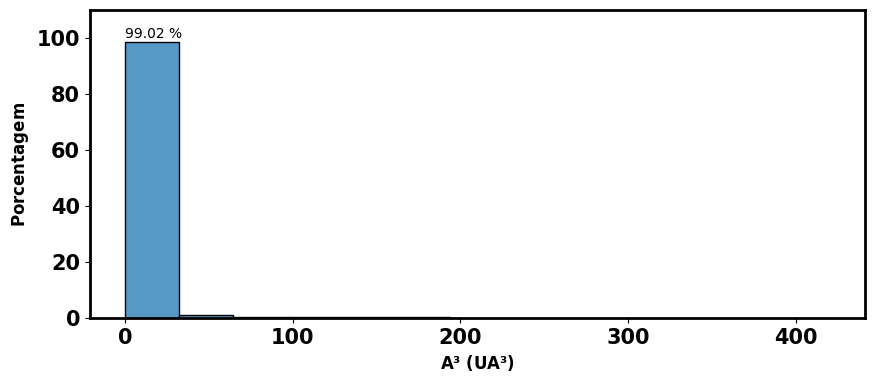

In [289]:
porcentagem = df_limpo[df_limpo['A^3'] <= 55].shape[0]/df_limpo.shape[0]

fig, ax = plt.subplots(figsize = (10, 4))

ax.set_xlabel(r'$\mathbf{A³\ (UA³)}$', fontsize = 12)
ax.set_ylabel(r'$\mathbf{Porcentagem}$', fontsize = 12)

def n_bins(n):
    '''Calcula o número de bins para uma distribuição seguindo a Regra de Sturges'''
    nbins = 1 + (10/3)*np.log10(n)
    nbins = int(nbins.round())                         #Arredondando pra cima o valor de bins
    return nbins

bordas(ax)

nbins = n_bins(df_limpo.shape[0])

ax.annotate(xy = (0, 100), text = f'{round(100*porcentagem, 2)} %')
sns.histplot(x = df_limpo['A^3'], bins = nbins, color = '#1f77b4', stat='percent')

plt.ylim(0, 110)

plt.show()

<font color = purple size = 4>

## Projeto metodo de discobertas

In [290]:
df_disc = df_g[['NAME', 'PLANETDISCMETH']]
hist_disc = df_disc.groupby(['PLANETDISCMETH'])[['NAME']].count().sort_values(by = 'NAME', ascending = True)
hist_disc['PLANETDISCMETH'] = hist_disc.index
hist_disc.reset_index(drop = True)

,NAME,PLANETDISCMETH
0,1,Transit Timing Variations
1,10,Imaging
2,10,Timing
3,16,Microlensing
4,587,RV
5,2636,Transit


<font color = purple size =4>
<p>

## Planetas descobertos com o telescópio Kepler

In [291]:
df_transito = df_g[df_g['PLANETDISCMETH'] == 'Transit']
df_kepler = df_transito.query("NAME.str.contains('Kepler')")

In [292]:
df_kepler.shape

(2243, 14)

In [293]:
df_nkepler = df_transito.query("not NAME.str.contains('Kepler')")
df_nkepler.head()

,NAME,ECC,ECCUPPER,ECCLOWER,MSTAR,MSTARUPPER,MSTARLOWER,PER,PERUPPER,PERLOWER,PLANETDISCMETH,A,AUPPER,ALOWER
7,WASP-14 b,0.091,0.003,0.003,1.310,0.050,0.100,0.006147,2.739726e-08,2.739726e-08,Transit,0.033557,9.970613e-08,9.970613e-08
10,WASP-105 b,0.000,0.040,0.000,0.890,0.090,0.090,0.021570,2.739726e-08,2.739726e-08,Transit,0.077487,6.561487e-08,6.561487e-08
15,HAT-P-27 b,0.000,NaN,NaN,0.920,0.060,0.060,0.008328,1.369863e-08,1.643836e-08,Transit,0.041085,4.505529e-08,5.406635e-08
26,HD 3167 b,0.000,NaN,NaN,0.866,0.033,0.033,0.002629,3.013699e-08,3.287671e-08,Transit,0.019049,1.455693e-07,1.588029e-07
34,WASP-21 b,0.000,NaN,NaN,1.010,0.030,0.030,0.011842,5.205479e-08,6.575342e-08,Transit,0.051955,1.522496e-07,1.923152e-07


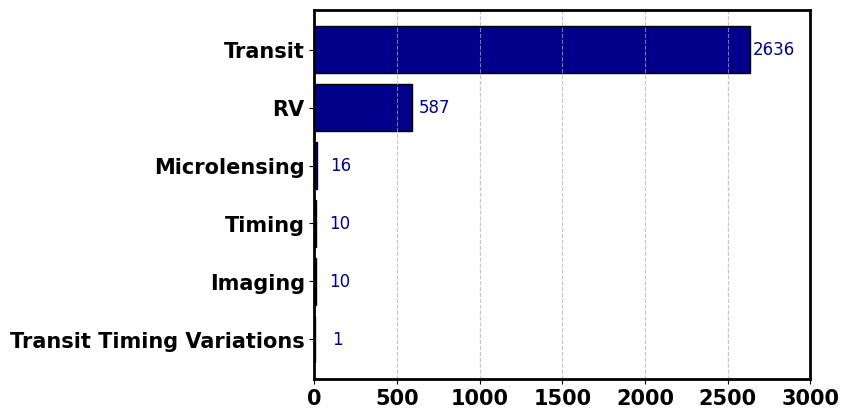

In [294]:
plt.style.use('default')
fig, ax = plt.subplots()

ax.barh(hist_disc['PLANETDISCMETH'], hist_disc['NAME'], color = 'darkblue', edgecolor = 'black')

for i, valor in enumerate(hist_disc['NAME']):
    ax.text(valor + 140, i, valor, color = 'darkblue', fontsize = 12, ha = 'center', va = 'center')

ax.set_xlim(0, 3000)
bordas(ax)

ax.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()